In [62]:
import numpy as np
import matplotlib.pyplot as plt

p = lambda x: -2/x
q = lambda x: 2/(x**2)
r = lambda x: np.sin(np.log(x))/(x**2)

a ,b = 1, 2  
ya, yb = 1, 2 

**Shooting Linear**

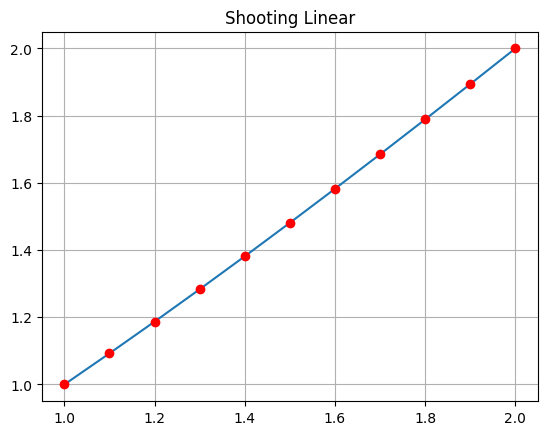

In [63]:
def runge_kutta(x, h, u1, u2, v1, v2, p, q, r):
    k1u1 = h * u2
    k1u2 = h * (p(x) * u2 + q(x) * u1 + r(x))
    k1v1 = h * v2
    k1v2 = h * (p(x) * v2 + q(x) * v1)
    
    k2u1 = h * (u2 + 0.5 * k1u2)
    k2u2 = h * (p(x + h / 2) * (u2 + 0.5 * k1u2) + q(x + h / 2) * (u1 + 0.5 * k1u1) + r(x + h / 2))
    k2v1 = h * (v2 + 0.5 * k1v2)
    k2v2 = h * (p(x + h / 2) * (v2 + 0.5 * k1v2) + q(x + h / 2) * (v1 + 0.5 * k1v1))
    
    k3u1 = h * (u2 + 0.5 * k2u2)
    k3u2 = h * (p(x + h / 2) * (u2 + 0.5 * k2u2) + q(x + h / 2) * (u1 + 0.5 * k2u1) + r(x + h / 2))
    k3v1 = h * (v2 + 0.5 * k2v2)
    k3v2 = h * (p(x + h / 2) * (v2 + 0.5 * k2v2) + q(x + h / 2) * (v1 + 0.5 * k2v1))
    
    k4u1 = h * (u2 + k3u2)
    k4u2 = h * (p(x + h) * (u2 + k3u2) + q(x + h) * (u1 + k3u1) + r(x + h))
    k4v1 = h * (v2 + k3v2)
    k4v2 = h * (p(x + h) * (v2 + k3v2) + q(x + h) * (v1 + k3v1))
    
    return k1u1, k1u2, k1v1, k1v2, k2u1, k2u2, k2v1, k2v2, k3u1, k3u2, k3v1, k3v2, k4u1, k4u2, k4v1, k4v2

def shooting_linear(a, b, alpha, beta, p, q, r, N = 10):
    h = (b - a) / N
    
    x = np.linspace(a, b, N + 1)
    
    u1 = np.zeros(N + 1)
    u2 = np.zeros(N + 1)
    v1 = np.zeros(N + 1)
    v2 = np.zeros(N + 1)
    
    u1[0] = alpha  
    u2[0] = 0      
    v1[0] = 0     
    v2[0] = 1     

    for i in range(N):
        k1u1, k1u2, k1v1, k1v2, k2u1, k2u2, k2v1, k2v2, k3u1, k3u2, k3v1, k3v2, k4u1, k4u2, k4v1, k4v2 = runge_kutta(x[i], h, u1[i], u2[i], v1[i], v2[i], p, q, r)

        u1[i + 1] = u1[i] + (1 / 6) * (k1u1 + 2 * k2u1 + 2 * k3u1 + k4u1)
        u2[i + 1] = u2[i] + (1 / 6) * (k1u2 + 2 * k2u2 + 2 * k3u2 + k4u2)
        v1[i + 1] = v1[i] + (1 / 6) * (k1v1 + 2 * k2v1 + 2 * k3v1 + k4v1)
        v2[i + 1] = v2[i] + (1 / 6) * (k1v2 + 2 * k2v2 + 2 * k3v2 + k4v2)
    
    w0 = (beta - u1[N]) / v1[N]
    
    w = np.zeros(N + 1)
    for i in range(N + 1):
        w[i] = u1[i] + w0 * v1[i]

    return x, w

x, w = shooting_linear(a, b, ya, yb, p, q, r)

plt.title("Shooting Linear")
plt.plot(x, w)
plt.plot(x, w, 'ro')
plt.grid()
plt.show()
